<a href="https://colab.research.google.com/github/EMMA-max-bit/DASHBOARD/blob/main/TeamoRanch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import pandas as pd
import numpy as np

In [2]:
# load the csv file
TDS = pd.read_csv("TeamoRanchData.csv")

In [3]:
# retrieved TDS
TDS.head()

,SalaryID,StaffID,Allowance1,Amount1,Date1,Allowance2,Amount3,Date4,Allowance5,Amount6,...,Date25,Allowance26,Amount27,Date28,Allowance29,Amount30,Date31,Allowance32,Amount33,Date34
0,TR0001,Ter,NaN,10000.0,1/31/2017,NaN,10000.0,2/28/2017,NaN,10000.0,...,9/30/2017,NaN,10000,10/30/2017,NaN,10000.0,11/30/2017,NaN,10000.0,12/30/2017
1,TR0002,Ngubuhgun,NaN,NaN,1/31/2017,NaN,NaN,2/28/2017,NaN,NaN,...,9/30/2017,NaN,5000,10/30/2017,NaN,5000.0,11/30/2017,NaN,5000.0,12/30/2017
2,TR0003,Odunayo,NaN,NaN,1/31/2017,NaN,5000.0,2/28/2017,NaN,5000.0,...,9/30/2017,NaN,NaN,10/30/2017,NaN,NaN,11/30/2017,NaN,NaN,12/30/2017
3,TR0004,Baba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9/30/2017,NaN,NaN,10/30/2017,NaN,NaN,11/30/2017,NaN,NaN,12/30/2017
4,TR0006,Ochuwara,NaN,NaN,1/31/2017,NaN,NaN,2/28/2017,NaN,5000.0,...,9/30/2017,NaN,5000,10/30/2017,NaN,5000.0,11/30/2017,NaN,5000.0,12/30/2017


In [4]:
# Convert from wide to long format
TDS_long = pd.melt(
    TDS,
    id_vars=["SalaryID", "StaffID"],
    var_name="Variable",
    value_name="Value"
)

# Separate the variable into type (Allowance, Amount, Date) and number
TDS_long['Type'] = TDS_long['Variable'].str.extract(r'([A-Za-z]+)\d+')
TDS_long['Number'] = TDS_long['Variable'].str.extract(r'[A-Za-z]+(\d+)').astype(int)

# Display the first few rows of the long format DataFrame
display(TDS_long.head())

,SalaryID,StaffID,Variable,Value,Type,Number
0,TR0001,Ter,Allowance1,NaN,Allowance,1
1,TR0002,Ngubuhgun,Allowance1,NaN,Allowance,1
2,TR0003,Odunayo,Allowance1,NaN,Allowance,1
3,TR0004,Baba,Allowance1,NaN,Allowance,1
4,TR0006,Ochuwara,Allowance1,NaN,Allowance,1


In [5]:
# Pivot the data to get separate columns for Allowance, Amount, and Date
TDS_tidy = TDS_long.pivot_table(index=["SalaryID", "StaffID", "Number"], columns="Type", values="Value", aggfunc='first').reset_index()

# Rename columns for clarity
TDS_tidy.columns.name = None
TDS_tidy = TDS_tidy.rename(columns={'Amount': 'Amount', 'Allowance': 'Allowance', 'Date': 'Date'})

# Convert 'Date' column to datetime objects, coercing errors
TDS_tidy['Date'] = pd.to_datetime(TDS_tidy['Date'], errors='coerce')

# Display the first few rows of the tidy DataFrame
display(TDS_tidy.head())

,SalaryID,StaffID,Number,Allowance,Amount,Date
0,TR0001,Ter,1,NaN,10000.0,2017-01-31
1,TR0001,Ter,3,NaN,10000.0,NaT
2,TR0001,Ter,4,NaN,NaN,2017-02-28
3,TR0001,Ter,5,1500.0,NaN,NaT
4,TR0001,Ter,6,NaN,10000.0,NaT


In [6]:
# Extract day, month, and year from the 'Date' column
TDS_tidy['Day'] = TDS_tidy['Date'].dt.day
TDS_tidy['Month'] = TDS_tidy['Date'].dt.month
TDS_tidy['Year'] = TDS_tidy['Date'].dt.year

# Display the first few rows with the new columns
display(TDS_tidy.head())

,SalaryID,StaffID,Number,Allowance,Amount,Date,Day,Month,Year
0,TR0001,Ter,1,NaN,10000.0,2017-01-31,31.0,1.0,2017.0
1,TR0001,Ter,3,NaN,10000.0,NaT,NaN,NaN,NaN
2,TR0001,Ter,4,NaN,NaN,2017-02-28,28.0,2.0,2017.0
3,TR0001,Ter,5,1500.0,NaN,NaT,NaN,NaN,NaN
4,TR0001,Ter,6,NaN,10000.0,NaT,NaN,NaN,NaN


In [8]:
# Infer object types and then replace NaN values with 0
TDS_tidy = TDS_tidy.infer_objects(copy=False).fillna(0)

# Display the first few rows to verify the changes
display(TDS_tidy.head())

,SalaryID,StaffID,Number,Allowance,Amount,Date,Day,Month,Year
0,TR0001,Ter,1,0.0,10000.0,2017-01-31 00:00:00,31.0,1.0,2017.0
1,TR0001,Ter,3,0.0,10000.0,0,0.0,0.0,0.0
2,TR0001,Ter,4,0.0,0,2017-02-28 00:00:00,28.0,2.0,2017.0
3,TR0001,Ter,5,1500.0,0,0,0.0,0.0,0.0
4,TR0001,Ter,6,0.0,10000.0,0,0.0,0.0,0.0


In [25]:
# retrieved the dataframe
TDS_tidy.head(10)

,SalaryID,StaffID,Number,Allowance,Amount,Date,Day,Month,Year
0,TR0001,Ter,1,0.0,10000.0,2017-01-31 00:00:00,31.0,1.0,2017.0
1,TR0001,Ter,3,0.0,10000.0,0,0.0,0.0,0.0
2,TR0001,Ter,4,0.0,0,2017-02-28 00:00:00,28.0,2.0,2017.0
3,TR0001,Ter,5,1500.0,0,0,0.0,0.0,0.0
4,TR0001,Ter,6,0.0,10000.0,0,0.0,0.0,0.0
5,TR0001,Ter,7,0.0,0,2017-03-30 00:00:00,30.0,3.0,2017.0
6,TR0001,Ter,8,500.0,0,0,0.0,0.0,0.0
7,TR0001,Ter,9,0.0,10000.0,0,0.0,0.0,0.0
8,TR0001,Ter,10,0.0,0,2017-04-30 00:00:00,30.0,4.0,2017.0
9,TR0001,Ter,11,1500.0,0,0,0.0,0.0,0.0


In [26]:
TDS_tidy.tail(10)

,SalaryID,StaffID,Number,Allowance,Amount,Date,Day,Month,Year
1032,TRP0003,Aanuolwuapo,16,0.0,0,2020-06-30 00:00:00,30.0,6.0,2020.0
1033,TRP0003,Aanuolwuapo,17,1100.0,0,0,0.0,0.0,0.0
1034,TRP0003,Aanuolwuapo,18,0.0,15000,0,0.0,0.0,0.0
1035,TRP0003,Aanuolwuapo,19,0.0,0,2020-07-30 00:00:00,30.0,7.0,2020.0
1036,TRP0003,Aanuolwuapo,20,600.0,0,0,0.0,0.0,0.0
1037,TRP0003,Aanuolwuapo,22,0.0,0,2020-08-30 00:00:00,30.0,8.0,2020.0
1038,TRP0003,Aanuolwuapo,25,0.0,0,2020-09-30 00:00:00,30.0,9.0,2020.0
1039,TRP0003,Aanuolwuapo,28,0.0,0,2021-10-30 00:00:00,30.0,10.0,2021.0
1040,TRP0003,Aanuolwuapo,31,0.0,0,2021-11-30 00:00:00,30.0,11.0,2021.0
1041,TRP0003,Aanuolwuapo,34,0.0,0,2021-12-30 00:00:00,30.0,12.0,2021.0


In [13]:
# Remove rows where Allowance, Amount, Date, Day, Month, and Year are all 0
TDS_filtered = TDS_tidy[
    (TDS_tidy['Allowance'] != 0) |
    (TDS_tidy['Amount'] != 0) |
    (TDS_tidy['Date'] != 0) |
    (TDS_tidy['Day'] != 0) |
    (TDS_tidy['Month'] != 0) |
    (TDS_tidy['Year'] != 0)
]

# Display the first few rows of the filtered DataFrame
display(TDS_filtered.head())

,SalaryID,StaffID,Number,Allowance,Amount,Date,Day,Month,Year
0,TR0001,Ter,1,0.0,10000.0,2017-01-31 00:00:00,31.0,1.0,2017.0
1,TR0001,Ter,3,0.0,10000.0,0,0.0,0.0,0.0
2,TR0001,Ter,4,0.0,0,2017-02-28 00:00:00,28.0,2.0,2017.0
3,TR0001,Ter,5,1500.0,0,0,0.0,0.0,0.0
4,TR0001,Ter,6,0.0,10000.0,0,0.0,0.0,0.0


In [14]:
# Calculate summary statistics for 'Allowance' and 'Amount' on the filtered data
allowance_stats_filtered = TDS_filtered['Allowance'].describe()
amount_stats_filtered = TDS_filtered['Amount'].describe()

# Display the summary statistics for the filtered data
print("Summary Statistics for Allowance (Filtered Data):")
display(allowance_stats_filtered)

print("\nSummary Statistics for Amount (Filtered Data):")
display(amount_stats_filtered)

Summary Statistics for Allowance (Filtered Data):


,Allowance
count,1042.000000
mean,251.055662
std,812.326292
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,12000.000000



Summary Statistics for Amount (Filtered Data):


,Amount
count,1042
unique,26
top,0
freq,832


# Task
Analyze the data by StaffID.

## Group data by staffid

### Subtask:
Group the `TDS_filtered` DataFrame by the 'StaffID' column.


**Reasoning**:
Group the filtered DataFrame by StaffID as requested.



In [15]:
# Group the DataFrame by 'StaffID'
grouped_by_staff = TDS_filtered.groupby('StaffID')

# Display the grouped object (optional, just to show it worked)
print(grouped_by_staff)

## Calculate aggregate statistics

### Subtask:
Calculate relevant aggregate statistics (e.g., sum, mean, count) for 'Allowance' and 'Amount' for each StaffID.


**Reasoning**:
Calculate the sum, mean, and count of non-zero entries for 'Allowance' and 'Amount' for each StaffID using the grouped_by_staff object and display the head of each resulting DataFrame.



In [16]:
# Calculate the sum of 'Allowance' and 'Amount' for each StaffID
staff_summary_sum = grouped_by_staff[['Allowance', 'Amount']].sum()

# Calculate the mean of 'Allowance' and 'Amount' for each StaffID
staff_summary_mean = grouped_by_staff[['Allowance', 'Amount']].mean()

# Calculate the count of non-zero entries for 'Allowance' and 'Amount' for each StaffID
staff_summary_count = grouped_by_staff[['Allowance', 'Amount']].agg(lambda x: (x != 0).sum())

# Display the first few rows of each summary DataFrame
print("Sum of Allowance and Amount by StaffID:")
display(staff_summary_sum.head())

print("\nMean of Allowance and Amount by StaffID:")
display(staff_summary_mean.head())

print("\nCount of Non-Zero Allowance and Amount by StaffID:")
display(staff_summary_count.head())

TypeError: unsupported operand type(s) for +: 'float' and 'str'

**Reasoning**:
The error message "TypeError: unsupported operand type(s) for +: 'float' and 'str'" indicates that the 'Amount' column still contains string values which are incompatible with the sum operation. I need to convert the 'Amount' column to a numeric type before performing the aggregation.



In [17]:
# Convert 'Amount' column to numeric, coercing errors to NaN, then fill NaN with 0
TDS_filtered['Amount'] = pd.to_numeric(TDS_filtered['Amount'], errors='coerce').fillna(0)

# Calculate the sum of 'Allowance' and 'Amount' for each StaffID
staff_summary_sum = grouped_by_staff[['Allowance', 'Amount']].sum()

# Calculate the mean of 'Allowance' and 'Amount' for each StaffID
staff_summary_mean = grouped_by_staff[['Allowance', 'Amount']].mean()

# Calculate the count of non-zero entries for 'Allowance' and 'Amount' for each StaffID
staff_summary_count = grouped_by_staff[['Allowance', 'Amount']].agg(lambda x: (x != 0).sum())

# Display the first few rows of each summary DataFrame
print("Sum of Allowance and Amount by StaffID:")
display(staff_summary_sum.head())

print("\nMean of Allowance and Amount by StaffID:")
display(staff_summary_mean.head())

print("\nCount of Non-Zero Allowance and Amount by StaffID:")
display(staff_summary_count.head())

Sum of Allowance and Amount by StaffID:


,Allowance,Amount
StaffID,,
Aanuolwuapo,1700.0,45000.0
Adewuyi Mrs,0.0,0.0
Aquatech,0.0,0.0
Ayuba,11400.0,40000.0
Baba,0.0,31000.0



Mean of Allowance and Amount by StaffID:


,Allowance,Amount
StaffID,,
Aanuolwuapo,100.0,2647.058824
Adewuyi Mrs,0.0,0.000000
Aquatech,0.0,0.000000
Ayuba,456.0,1600.000000
Baba,0.0,2583.333333



Count of Non-Zero Allowance and Amount by StaffID:


,Allowance,Amount
StaffID,,
Aanuolwuapo,2,3
Adewuyi Mrs,0,0
Aquatech,0,0
Ayuba,7,8
Baba,0,4


## Visualize individual staff data

### Subtask:
Create visualizations (e.g., bar plots) to compare aggregate statistics across different staff members.


**Reasoning**:
Create bar plots for the sum, mean, and count of Allowance and Amount for each StaffID using the previously calculated summary dataframes to visualize the aggregate statistics.



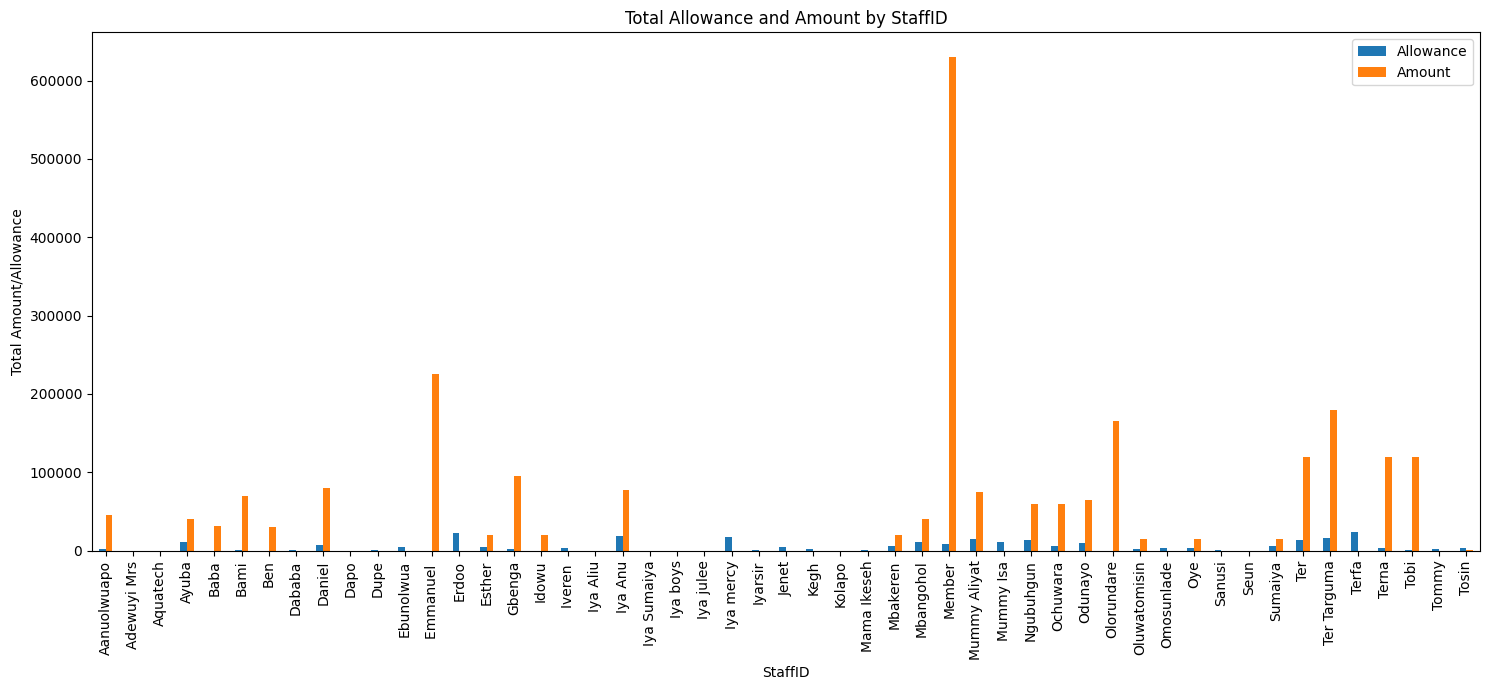

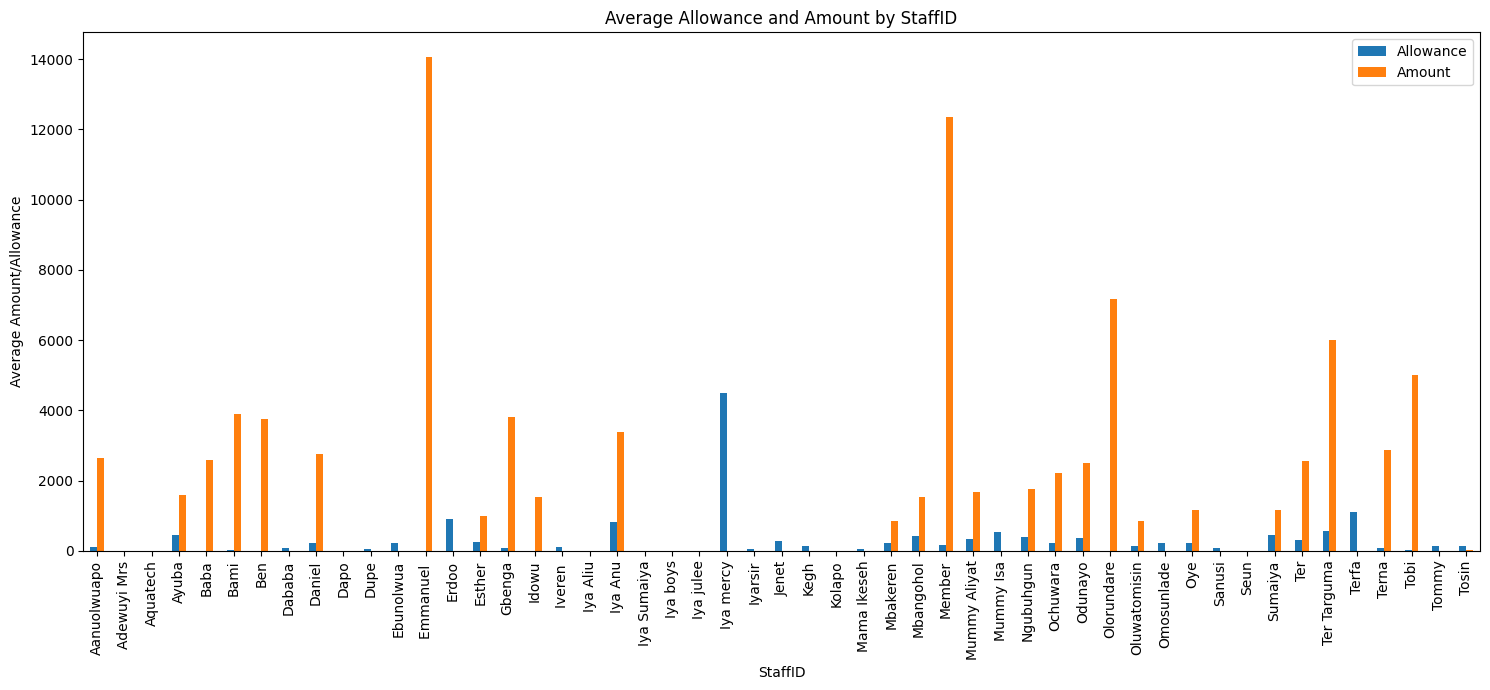

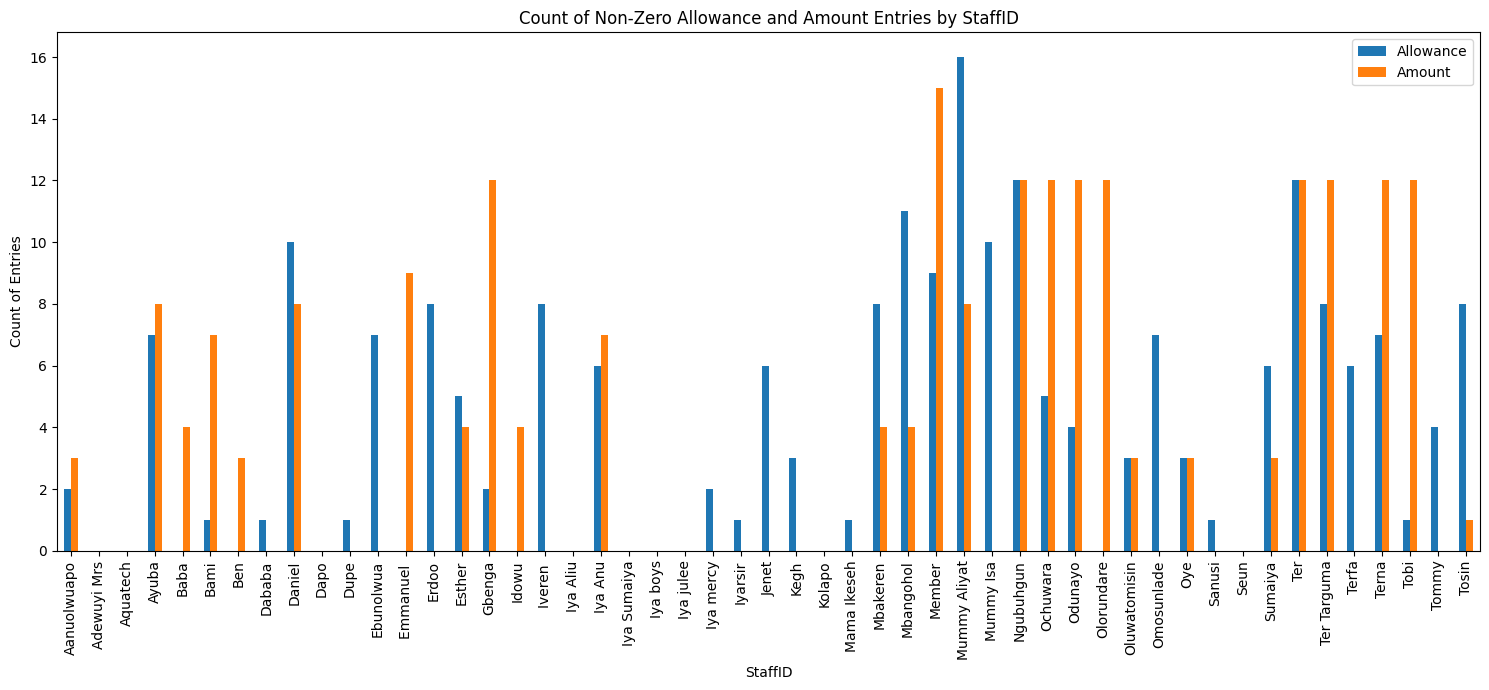

In [18]:
import matplotlib.pyplot as plt

# Create a bar plot of staff_summary_sum
fig1, ax1 = plt.subplots(figsize=(15, 7))
staff_summary_sum.plot(kind='bar', ax=ax1)
ax1.set_xlabel('StaffID')
ax1.set_ylabel('Total Amount/Allowance')
ax1.set_title('Total Allowance and Amount by StaffID')
plt.tight_layout()
plt.show()

# Create a bar plot of staff_summary_mean
fig2, ax2 = plt.subplots(figsize=(15, 7))
staff_summary_mean.plot(kind='bar', ax=ax2)
ax2.set_xlabel('StaffID')
ax2.set_ylabel('Average Amount/Allowance')
ax2.set_title('Average Allowance and Amount by StaffID')
plt.tight_layout()
plt.show()

# Create a bar plot of staff_summary_count
fig3, ax3 = plt.subplots(figsize=(15, 7))
staff_summary_count.plot(kind='bar', ax=ax3)
ax3.set_xlabel('StaffID')
ax3.set_ylabel('Count of Entries')
ax3.set_title('Count of Non-Zero Allowance and Amount Entries by StaffID')
plt.tight_layout()
plt.show()

## Analyze trends over time for staff

### Subtask:
If interested, analyze trends in 'Allowance' and 'Amount' over time for individual staff members.


**Reasoning**:
Select a few StaffIDs, filter the data for each selected StaffID, group by year and month, and calculate the sum of 'Allowance' and 'Amount'.



In [19]:
# Select a few StaffIDs for detailed analysis
selected_staff_ids = ['Ter', 'Ngubuhgun', 'Odunayo']

# Dictionary to store grouped data for each selected StaffID
staff_time_trends = {}

for staff_id in selected_staff_ids:
    # Filter the DataFrame for the current StaffID
    staff_data = TDS_filtered[TDS_filtered['StaffID'] == staff_id].copy()

    # Ensure Date column is datetime type before grouping
    staff_data['Date'] = pd.to_datetime(staff_data['Date'], errors='coerce')

    # Drop rows where Date is NaT after coercion
    staff_data.dropna(subset=['Date'], inplace=True)

    # Group by Year and Month and calculate the sum of 'Allowance' and 'Amount'
    # Create a PeriodIndex for grouping by Year and Month
    staff_data['YearMonth'] = staff_data['Date'].dt.to_period('M')
    time_trend = staff_data.groupby('YearMonth')[['Allowance', 'Amount']].sum()

    # Store the time trend data in the dictionary
    staff_time_trends[staff_id] = time_trend

# Display the first few rows of the time trend data for each selected StaffID
for staff_id, trend_data in staff_time_trends.items():
    print(f"Time Trend Data for {staff_id}:")
    display(trend_data.head())

Time Trend Data for Ter:


,Allowance,Amount
YearMonth,,
1970-01,13800.0,110000.0
2017-01,0.0,10000.0
2017-02,0.0,0.0
2017-03,0.0,0.0
2017-04,0.0,0.0


Time Trend Data for Ngubuhgun:


,Allowance,Amount
YearMonth,,
1970-01,10700.0,55000.0
2017-01,2500.0,5000.0
2017-02,0.0,0.0
2017-03,0.0,0.0
2017-04,0.0,0.0


Time Trend Data for Odunayo:


,Allowance,Amount
YearMonth,,
1970-01,8000.0,55015.0
2017-01,1300.0,10000.0
2017-02,0.0,0.0
2017-03,0.0,0.0
2017-04,0.0,0.0


**Reasoning**:
Plot the time trends for each selected staff member's Allowance and Amount.



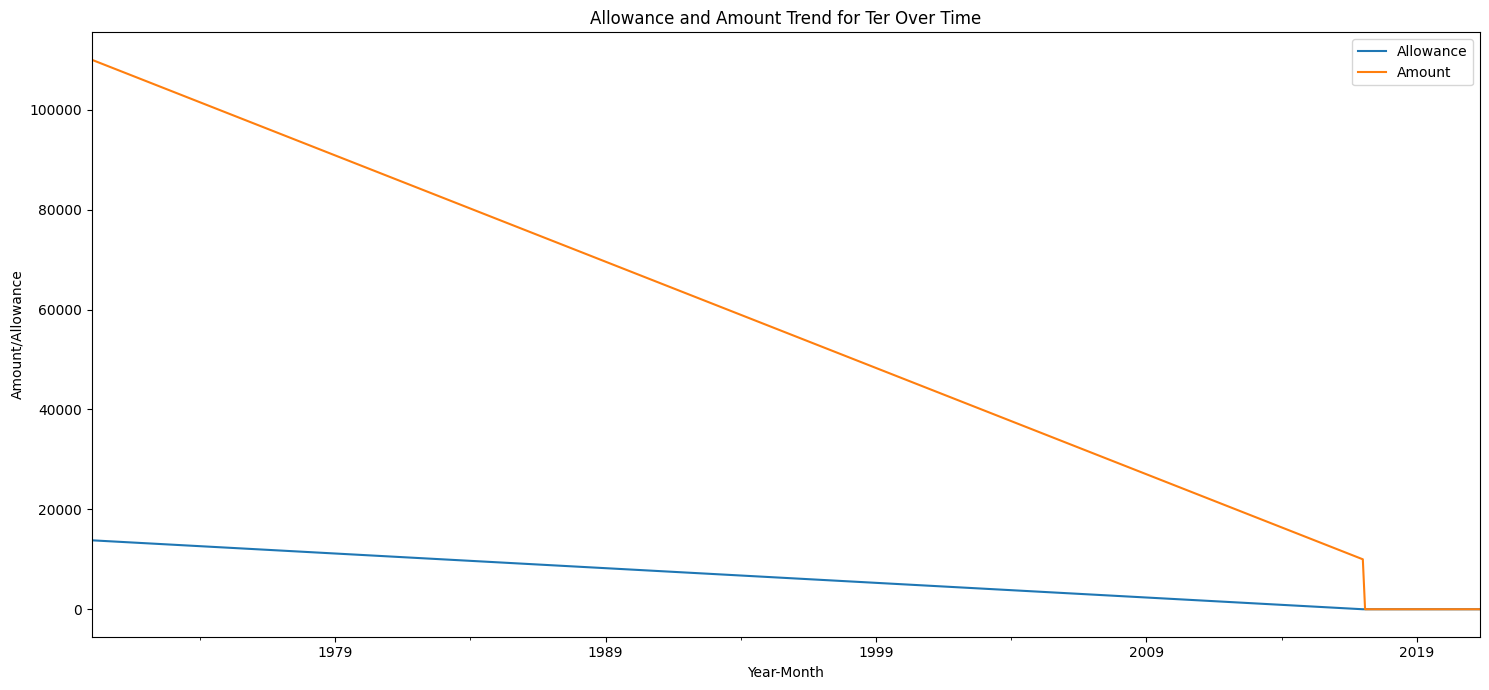

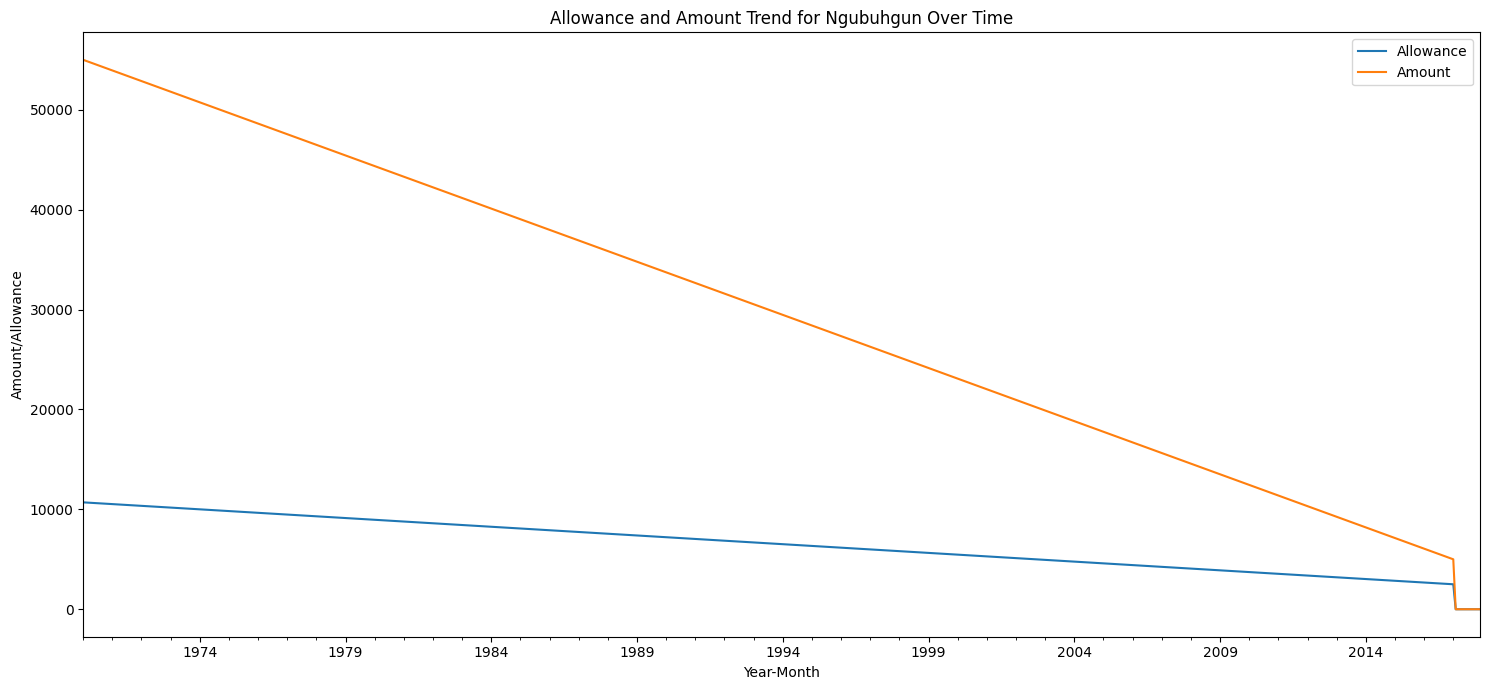

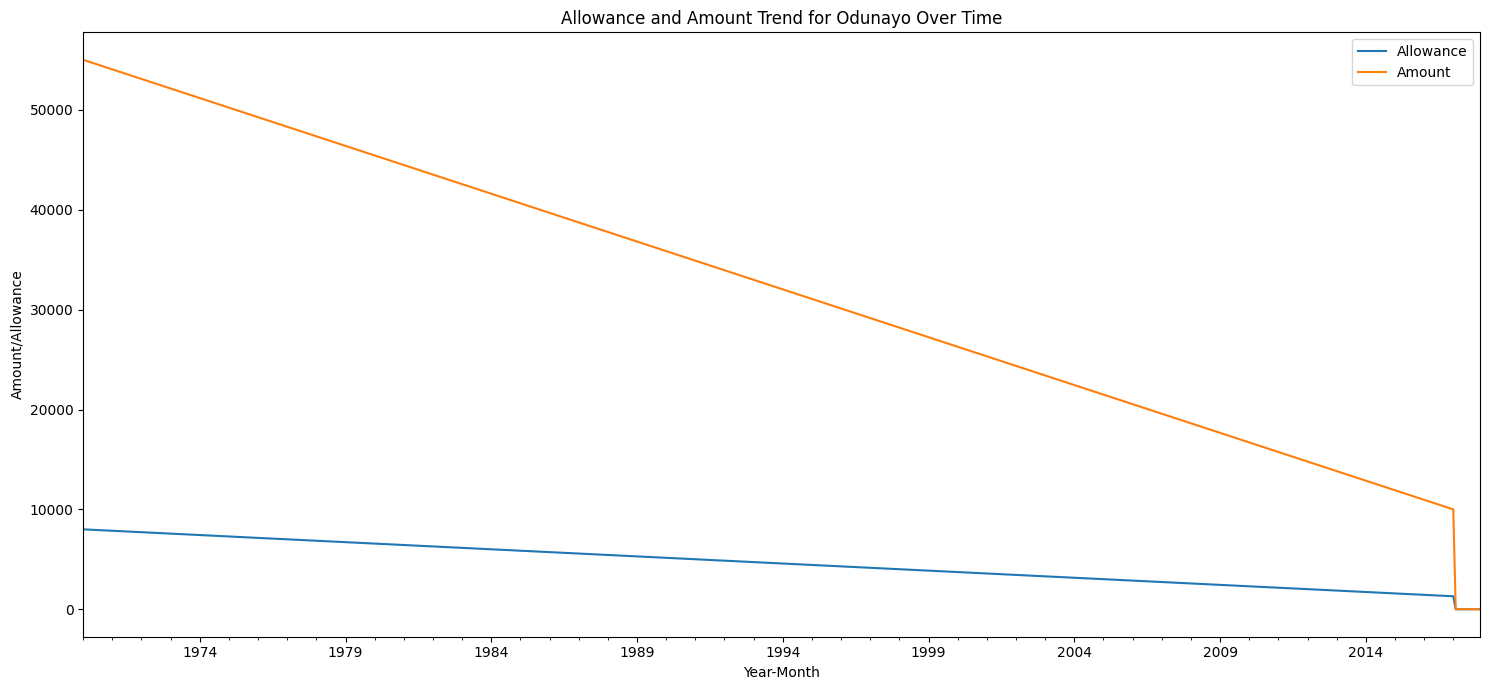

In [20]:
import matplotlib.pyplot as plt

# Plotting the time trends for each selected StaffID
for staff_id, trend_data in staff_time_trends.items():
    fig, ax = plt.subplots(figsize=(15, 7))
    trend_data.plot(kind='line', ax=ax)
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Amount/Allowance')
    ax.set_title(f'Allowance and Amount Trend for {staff_id} Over Time')
    plt.tight_layout()
    plt.show()

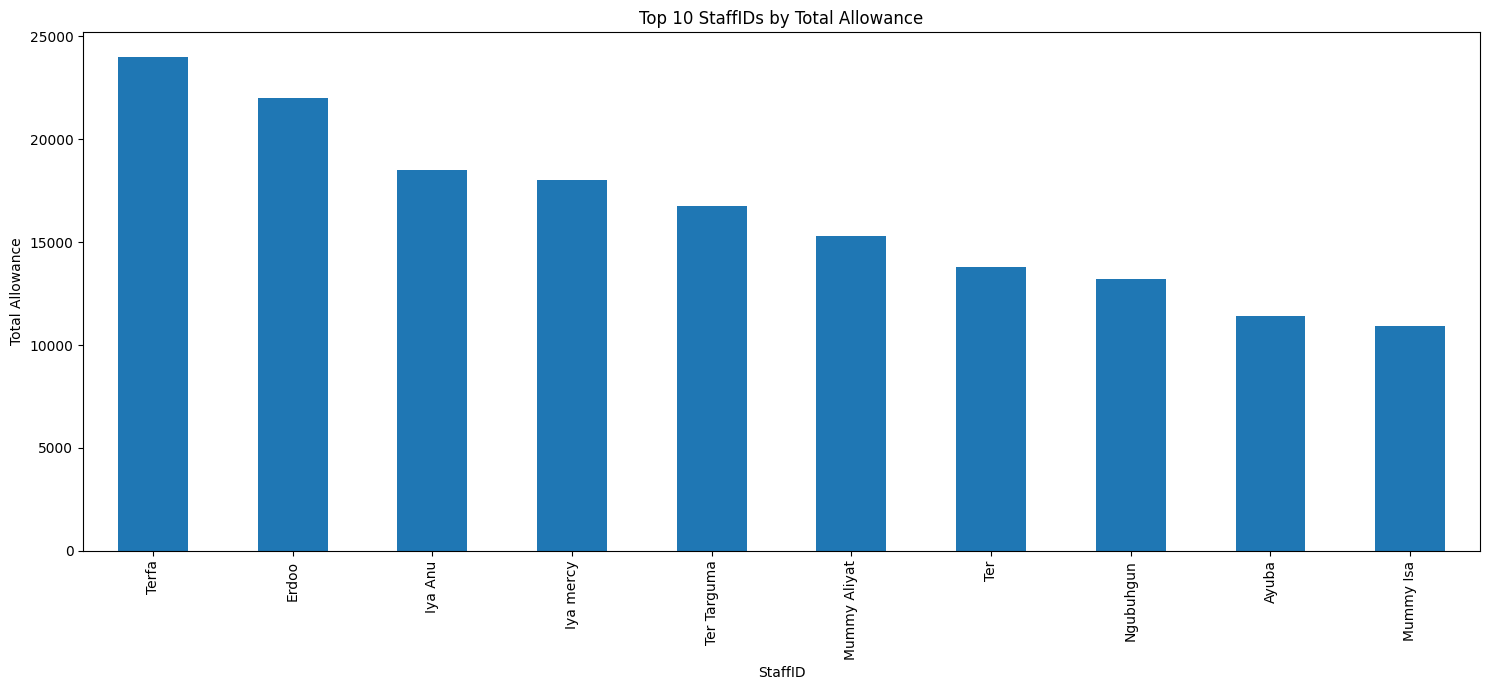

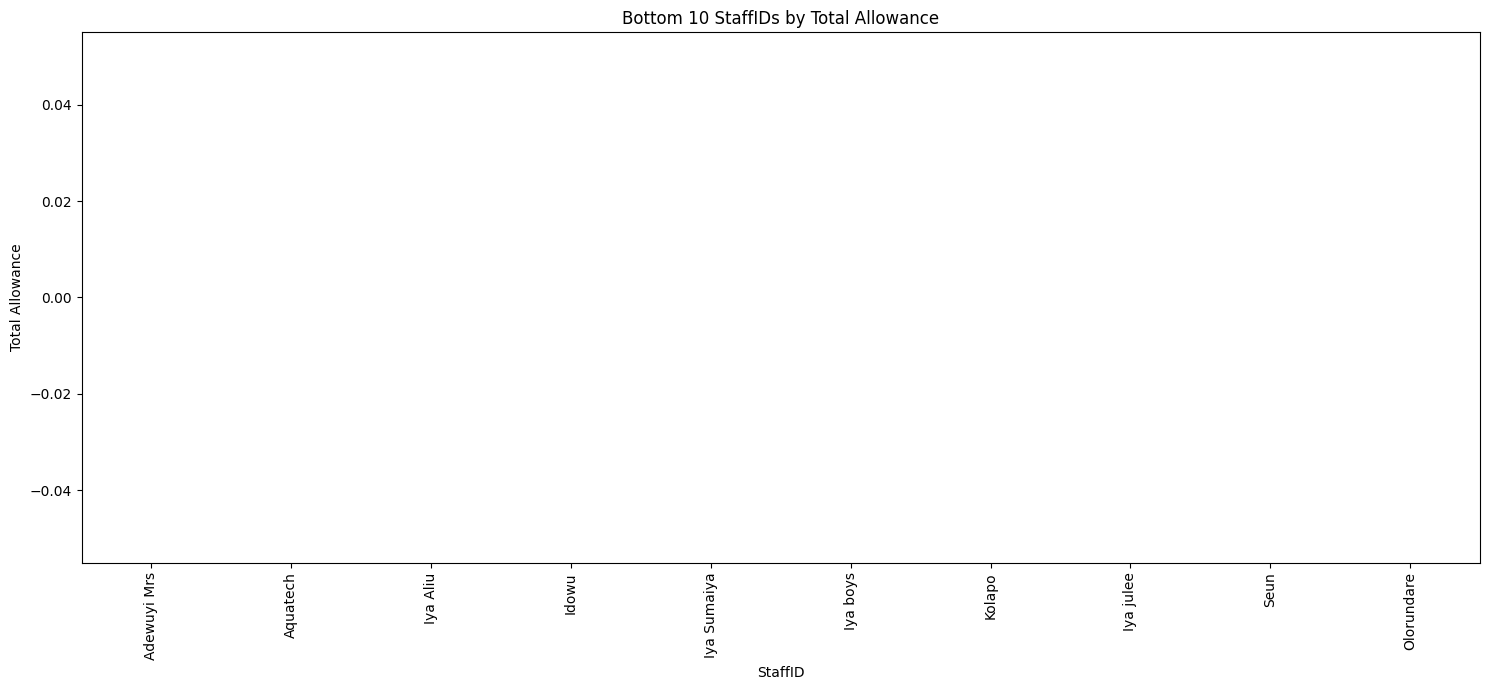

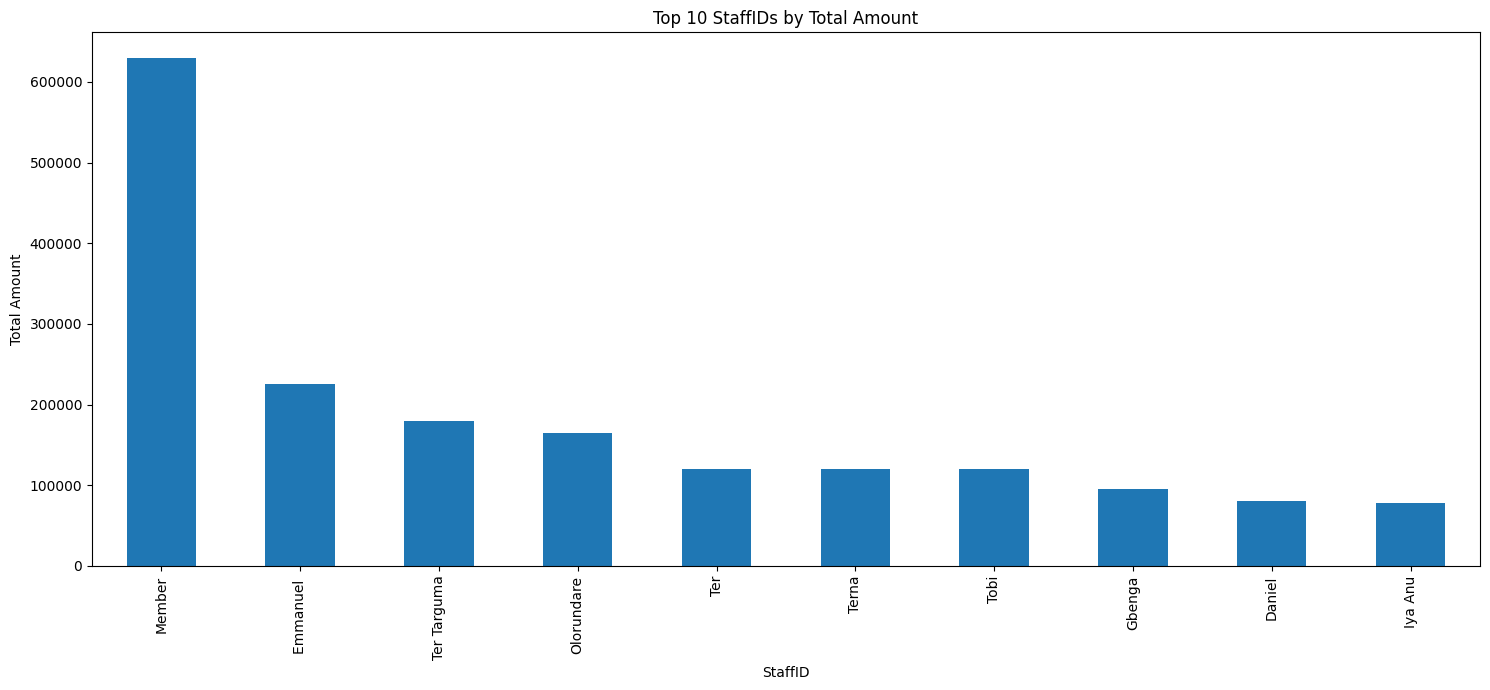

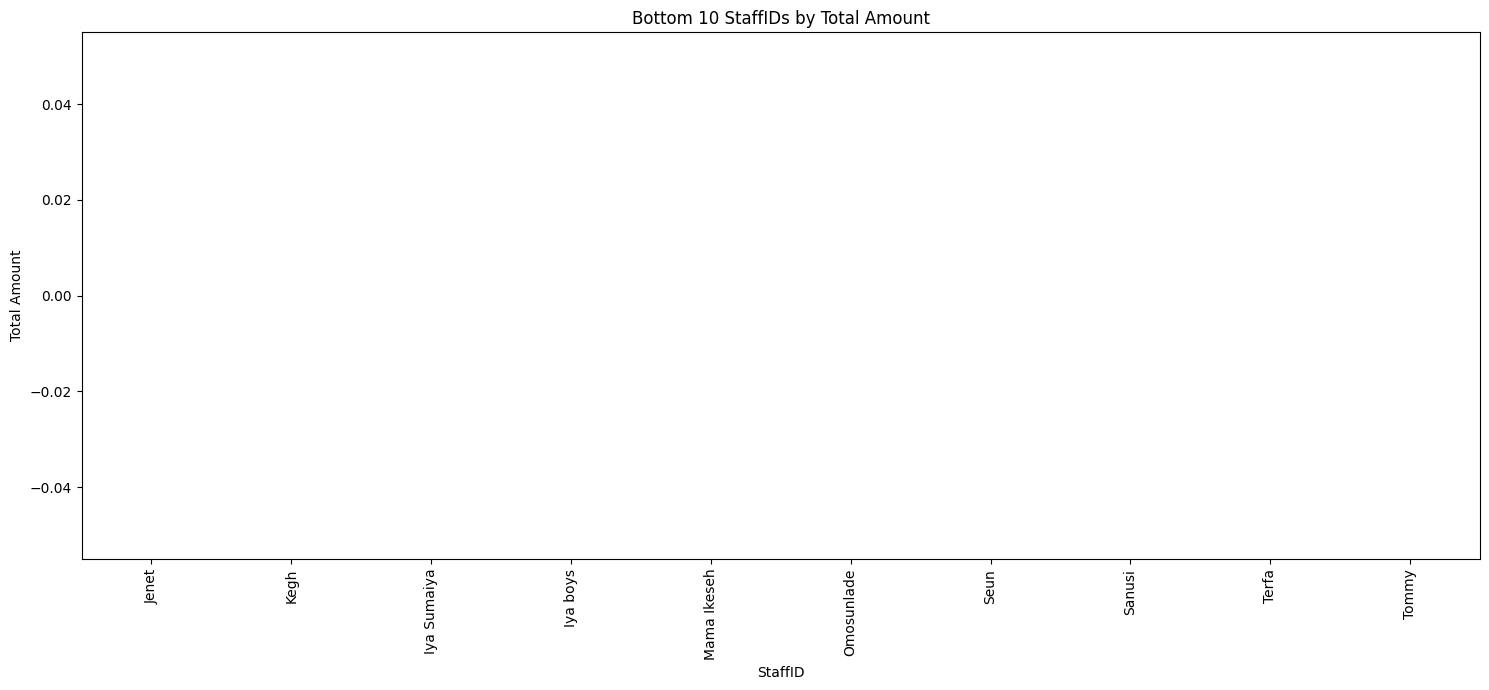

In [23]:
import matplotlib.pyplot as plt

# Sort staff_summary_sum by 'Allowance' and select top/bottom 10
staff_allowance_sorted = staff_summary_sum.sort_values(by='Allowance', ascending=False)
top_10_allowance = staff_allowance_sorted.head(10)
bottom_10_allowance = staff_allowance_sorted.tail(10)

# Sort staff_summary_sum by 'Amount' and select top/bottom 10
staff_amount_sorted = staff_summary_sum.sort_values(by='Amount', ascending=False)
top_10_amount = staff_amount_sorted.head(10)
bottom_10_amount = staff_amount_sorted.tail(10)

# Create bar plot for top 10 Allowance
fig4, ax4 = plt.subplots(figsize=(15, 7))
top_10_allowance['Allowance'].plot(kind='bar', ax=ax4)
ax4.set_xlabel('StaffID')
ax4.set_ylabel('Total Allowance')
ax4.set_title('Top 10 StaffIDs by Total Allowance')
plt.tight_layout()
plt.show()

# Create bar plot for bottom 10 Allowance
fig5, ax5 = plt.subplots(figsize=(15, 7))
bottom_10_allowance['Allowance'].plot(kind='bar', ax=ax5)
ax5.set_xlabel('StaffID')
ax5.set_ylabel('Total Allowance')
ax5.set_title('Bottom 10 StaffIDs by Total Allowance')
plt.tight_layout()
plt.show()

# Create bar plot for top 10 Amount
fig6, ax6 = plt.subplots(figsize=(15, 7))
top_10_amount['Amount'].plot(kind='bar', ax=ax6)
ax6.set_xlabel('StaffID')
ax6.set_ylabel('Total Amount')
ax6.set_title('Top 10 StaffIDs by Total Amount')
plt.tight_layout()
plt.show()

# Create bar plot for bottom 10 Amount
fig7, ax7 = plt.subplots(figsize=(15, 7))
bottom_10_amount['Amount'].plot(kind='bar', ax=ax7)
ax7.set_xlabel('StaffID')
ax7.set_ylabel('Total Amount')
ax7.set_title('Bottom 10 StaffIDs by Total Amount')
plt.tight_layout()
plt.show()

In [24]:
# Display the table showing the total amount and allowance for each StaffID
display(staff_summary_sum)

,Allowance,Amount
StaffID,,
Aanuolwuapo,1700.0,45000.0
Adewuyi Mrs,0.0,0.0
Aquatech,0.0,0.0
Ayuba,11400.0,40000.0
Baba,0.0,31000.0
Bami,500.0,70000.0
Ben,0.0,30000.0
Dababa,1000.0,0.0
Daniel,6750.0,80000.0


In [27]:
# Save the cleaned dataset to a CSV file
TDS_filtered.to_csv('cleaned_teamo_ranch_data.csv', index=False)

print("Cleaned dataset saved to 'cleaned_teamo_ranch_data.csv'")

Cleaned dataset saved to 'cleaned_teamo_ranch_data.csv'
